In [41]:
import os
print(os.getcwd())

/Users/lakshaykapur/Developer/ADS/MERA_Analysis/ADS


In [42]:
import numpy as np
import pandas as pd

In [43]:
file_path = '/Users/lakshaykapur/Developer/ADS/dly532.csv'
if os.path.exists(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
        #print(data)
else:
    print(f"File not found: {file_path}")

In [44]:
df = pd.read_csv(file_path, delimiter=',')
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.head()

,date,ind,maxtp,ind,mintp,igmin,gmin,ind,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-jan-1942,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,02-jan-1942,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,03-jan-1942,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,04-jan-1942,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,05-jan-1942,0,3.5,1,-0.8,0,0.0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,


In [45]:
print(df.shape) #rows & cols
print(df.dtypes) #datatype of each var

(30255, 26)
0
date      object
ind       object
maxtp     object
ind       object
mintp     object
igmin     object
gmin      object
ind       object
rain      object
cbl       object
wdsp      object
ind       object
hm        object
ind       object
ddhm      object
ind       object
hg        object
sun       object
dos       object
g_rad     object
soil      object
pe        object
evap      object
smd_wd    object
smd_md    object
smd_pd    object
dtype: object


In [46]:
# Define the latitude and longitude values
latitude = 53.428
longitude = -6.241
station = "Dublin Airport"

# Add the columns to the DataFrame
df['Latitude'] = latitude
df['Longitude'] = longitude
df['Station Name'] = station

In [47]:
df["date"] = pd.to_datetime(df["date"])  # Convert to datetime
df["ind"] = df["ind"].astype("category")  # Convert to category
numeric_columns = ["maxtp", "mintp", "rain", "wdsp", "sun", "soil", "smd_wd", "smd_md", "smd_pd", "hm", "hg", "ddhm"]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors="coerce")  # Convert to float

/var/folders/qt/k1yvp7ls32j_71y26w2m42qc0000gn/T/ipykernel_46673/3691221641.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])  # Convert to datetime


In [48]:
print(df.info())  # Verify the datatypes
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30255 entries, 0 to 30254
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          30255 non-null  datetime64[ns]
 1   ind           30255 non-null  category      
 2   maxtp         30255 non-null  float64       
 3   ind           30255 non-null  category      
 4   mintp         30255 non-null  float64       
 5   igmin         30255 non-null  object        
 6   gmin          30255 non-null  object        
 7   ind           30255 non-null  category      
 8   rain          30255 non-null  float64       
 9   cbl           30255 non-null  object        
 10  wdsp          30255 non-null  float64       
 11  ind           30255 non-null  category      
 12  hm            29368 non-null  float64       
 13  ind           30255 non-null  category      
 14  ddhm          29356 non-null  float64       
 15  ind           30255 non-null  catego

In [49]:
print(df.isna().sum())

0
date                0
ind                 0
maxtp               0
ind                 0
mintp               0
igmin               0
gmin                0
ind                 0
rain                0
cbl                 0
wdsp                0
ind                 0
hm                887
ind                 0
ddhm              899
ind                 0
hg                887
sun                 0
dos                 0
g_rad               0
soil             4322
pe                  0
evap                0
smd_wd          13814
smd_md          13814
smd_pd          13814
Latitude            0
Longitude           0
Station Name        0
dtype: int64


In [50]:
df['hm'] = df['hm'].fillna(df['hm'].mean())
df['ddhm'] = df['ddhm'].fillna(df['ddhm'].mean())
df['hg'] = df['hg'].fillna(df['hg'].mean())
df['soil'] = df['soil'].fillna(df['soil'].mean())

In [51]:
df['ddhm'].value_counts

<bound method IndexOpsMixin.value_counts of 0        203.924581
1        203.924581
2        203.924581
3        203.924581
4        203.924581
            ...    
30250    200.000000
30251    270.000000
30252    290.000000
30253    280.000000
30254    240.000000
Name: ddhm, Length: 30255, dtype: float64>

In [52]:
df.dropna(subset=['smd_wd', 'smd_md', 'smd_pd'], inplace=True, axis=0)

In [53]:
df.shape

(16441, 29)

In [54]:
print(df.isnull().sum())

0
date            0
ind             0
maxtp           0
ind             0
mintp           0
igmin           0
gmin            0
ind             0
rain            0
cbl             0
wdsp            0
ind             0
hm              0
ind             0
ddhm            0
ind             0
hg              0
sun             0
dos             0
g_rad           0
soil            0
pe              0
evap            0
smd_wd          0
smd_md          0
smd_pd          0
Latitude        0
Longitude       0
Station Name    0
dtype: int64


In [55]:
df.duplicated().sum() #check duplicates

0

In [56]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [57]:
print(df.head())

0           date ind  maxtp ind  mintp igmin  gmin ind  rain     cbl  ...  \
13814 1979-10-28   0   12.0   0    4.5     1  -1.9   0   0.9   997.9  ...   
13815 1979-10-29   0   11.0   0    4.0     0   2.7   0   0.7   998.8  ...   
13816 1979-10-30   0   15.7   0    8.8     0   7.4   0   4.8   990.8  ...   
13817 1979-10-31   0   12.6   0    7.1     0   5.3   0   0.5   990.0  ...   
13818 1979-11-01   0   11.4   0    5.5     0   4.0   2   0.0  1001.6  ...   

0      evap smd_wd  smd_md smd_pd  Latitude Longitude    Station Name  year  \
13814   0.9    0.0    -0.2   -0.2    53.428    -6.241  Dublin Airport  1979   
13815   0.8    0.0    -0.1   -0.3    53.428    -6.241  Dublin Airport  1979   
13816   1.0    0.0    -4.0   -4.4    53.428    -6.241  Dublin Airport  1979   
13817   1.2    0.5     0.5   -3.7    53.428    -6.241  Dublin Airport  1979   
13818   1.5    1.6     1.6   -2.3    53.428    -6.241  Dublin Airport  1979   

0     month day  
13814    10  28  
13815    10  29  
13816   

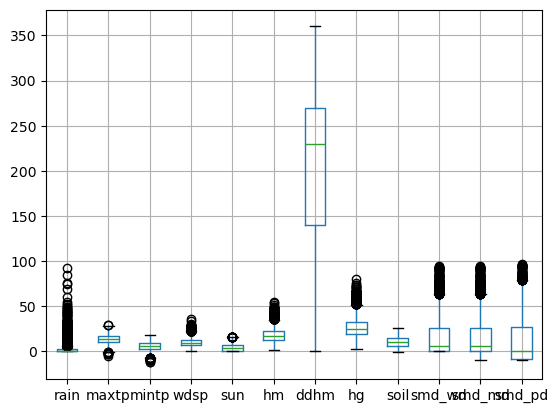

In [58]:
import matplotlib.pyplot as plt
df.boxplot(column=['rain', 'maxtp', 'mintp', 'wdsp', 'sun','hm', 'ddhm','hg', 'soil', 'smd_wd', 'smd_md', 'smd_pd'])
plt.show()

In [59]:
Q1 = df['rain'].quantile(0.25)
Q3 = df['rain'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['rain'] = df['rain'].clip(lower_bound, upper_bound)

In [60]:
#df['maxtp'] = df['maxtp'].clip(lower_bound, upper_bound)
#df['mintp'] = df['mintp'].clip(lower_bound, upper_bound)
#df['wdsp'] = df['wdsp'].clip(lower_bound, upper_bound)
#df['sun'] = df['sun'].clip(lower_bound, upper_bound)
#df['hm'] = df['hm'].clip(lower_bound, upper_bound)
#df['ddhm'] = df['ddhm'].clip(lower_bound, upper_bound)
#df['hg'] = df['hg'].clip(lower_bound, upper_bound)
#df['soil'] = df['soil'].clip(lower_bound, upper_bound)
df['smd_wd'] = df['smd_wd'].clip(lower_bound, upper_bound)
df['smd_md'] = df['smd_md'].clip(lower_bound, upper_bound)
df['smd_pd'] = df['smd_pd'].clip(lower_bound, upper_bound)

In [61]:
df['ddhm'].value_counts

<bound method IndexOpsMixin.value_counts of 13814    280.0
13815    240.0
13816    210.0
13817    250.0
13818    240.0
         ...  
30250    200.0
30251    270.0
30252    290.0
30253    280.0
30254    240.0
Name: ddhm, Length: 16441, dtype: float64>

In [62]:
df['temp_range'] = df['maxtp'] - df['mintp'] #calculating temp range
print(df['temp_range'])

13814     7.5
13815     7.0
13816     6.9
13817     5.5
13818     5.9
         ... 
30250    10.7
30251     3.5
30252     2.0
30253     5.4
30254     1.4
Name: temp_range, Length: 16441, dtype: float64


In [63]:
df['smd_combined'] = df[['smd_wd', 'smd_md', 'smd_pd']].mean(axis=1) #combine soil moistures into one score
print(df['smd_combined'])

13814   -0.133333
13815   -0.133333
13816   -2.300000
13817   -0.816667
13818    0.300000
           ...   
30250    2.316667
30251    1.916667
30252    2.250000
30253    2.650000
30254    3.050000
Name: smd_combined, Length: 16441, dtype: float64


In [64]:
df['ind'].value_counts

<bound method DataFrame.value_counts of 0     ind ind ind ind ind ind
13814   0   0   0   0   0   0
13815   0   0   0   0   0   0
13816   0   0   0   0   0   0
13817   0   0   0   0   0   0
13818   0   0   2   0   0   0
...    ..  ..  ..  ..  ..  ..
30250   0   0   0   0   0   0
30251   0   0   0   0   0   0
30252   0   0   0   0   0   0
30253   0   0   2   0   0   0
30254   0   0   0   0   0   0

[16441 rows x 6 columns]>

In [65]:
df = df.sort_values('date')
print(df['date'].diff().value_counts())

date
1 days    16440
Name: count, dtype: int64


In [66]:
#Converting wind direction to categories
def wind_direction(deg):
    print(f"Checking degree: {deg}")  # Debug print statement
    if pd.isna(deg):  # Check for NaN values
        return 'Invalid'
    deg = float(deg)  # Ensure deg is a numeric value
    
    if deg >= 337.5 or deg < 22.5:
        return 'N'
    elif 22.5 <= deg < 67.5:
        return 'NE'
    elif 67.5 <= deg < 112.5:
        return 'E'
    elif 112.5 <= deg < 157.5:
        return 'SE'
    elif 157.5 <= deg < 202.5:
        return 'S'
    elif 202.5 <= deg < 247.5:
        return 'SW'
    elif 247.5 <= deg < 292.5:
        return 'W'
    else:
        return 'NW'
df['wind_category'] = df['ddhm'].apply(wind_direction)

Checking degree: 280.0
Checking degree: 240.0
Checking degree: 210.0
Checking degree: 250.0
Checking degree: 240.0
Checking degree: 160.0
Checking degree: 220.0
Checking degree: 240.0
Checking degree: 230.0
Checking degree: 270.0
Checking degree: 260.0
Checking degree: 230.0
Checking degree: 360.0
Checking degree: 230.0
Checking degree: 350.0
Checking degree: 300.0
Checking degree: 280.0
Checking degree: 260.0
Checking degree: 290.0
Checking degree: 300.0
Checking degree: 240.0
Checking degree: 270.0
Checking degree: 240.0
Checking degree: 130.0
Checking degree: 220.0
Checking degree: 230.0
Checking degree: 260.0
Checking degree: 230.0
Checking degree: 220.0
Checking degree: 220.0
Checking degree: 220.0
Checking degree: 210.0
Checking degree: 230.0
Checking degree: 220.0
Checking degree: 220.0
Checking degree: 210.0
Checking degree: 220.0
Checking degree: 210.0
Checking degree: 250.0
Checking degree: 230.0
Checking degree: 240.0
Checking degree: 250.0
Checking degree: 240.0
Checking de

In [67]:
#Aggregate data for summaries
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({
    'rain': 'sum',
    'sun': 'sum',
    'maxtp': 'max',
    'mintp': 'min'
}).reset_index()

In [68]:
monthly_data['wdsp_avg'] = df.groupby(df['date'].dt.to_period('M'))['wdsp'].mean()

In [69]:
#Create flags for extreme 
df['extreme_rain'] = (df['rain'] > 2.15).astype(int)
df['heatwave'] = (df['maxtp'] > 3.21).astype(int)
df['high_wind'] = (df['hg'] > 5.59).astype(int)

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

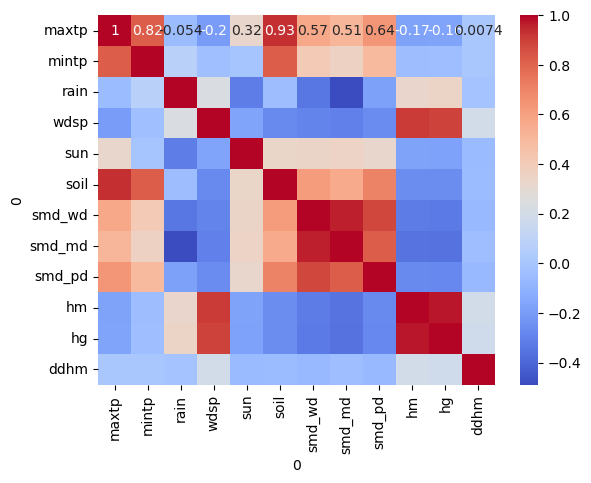

In [71]:
#check correlation
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [72]:
#creating pivot format for Tableau
long_data = df.melt(
    id_vars=['date'],
    value_vars=['maxtp', 'mintp', 'rain'],
    var_name='metric',
    value_name='value'
)

In [73]:
long_data.head()

,date,metric,value
0,1979-10-28,maxtp,12.0
1,1979-10-29,maxtp,11.0
2,1979-10-30,maxtp,15.7
3,1979-10-31,maxtp,12.6
4,1979-11-01,maxtp,11.4


In [74]:
#validate dataset completeness
complete_dates = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
missing_dates = set(complete_dates) - set(df['date'])
print("Missing dates:", missing_dates)

Missing dates: set()


In [75]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [76]:
print(df['sun'].describe())
print(df['sun'].unique())

count    1.644100e+04
mean    -1.301124e-16
std      1.000030e+00
min     -1.066924e+00
25%     -9.328344e-01
50%     -2.087523e-01
75%      6.762371e-01
max      3.197116e+00
Name: sun, dtype: float64
[ 0.05942632 -0.95965228 -0.90601657  0.72987278  0.81032635 -1.013288
 -0.58420227 -1.06692371 -0.07466297  0.59578349  0.67623706 -0.87919871
  1.10532279 -0.63783798  0.19351562  0.91759778  0.86396207 -0.04784511
 -0.74510942 -0.28920583 -0.61102013 -0.31602369 -0.47693084  0.1398799
 -0.12829868 -0.77192728 -0.23557011 -0.42329512 -0.26238797 -0.93283442
 -0.71829156  0.40805848 -1.04010586 -0.79874513  0.6494192  -0.10148082
 -0.20875226  0.43487634  0.38124062  0.00579061  0.56896563 -0.82556299
 -0.39647726 -0.55738441 -0.98647014  0.75669063 -0.15511654  0.78350849
  0.4616942   0.32760491  0.03260847 -0.85238085  0.83714421  0.35442276
  0.22033347  1.40031923  0.08624418 -0.6914737  -0.53056655 -0.1819344
  1.13214065  1.50759066  1.42713709  1.34668351 -0.3696594   1.96349425

In [77]:
#Binning for better aggregation
# Binning to include negative values and the full range
bins = [-float('inf'), -0.5, 0, 1, 2, 3, float('inf')]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extremely High']

# Apply pd.cut
df['sun_category'] = pd.cut(df['sun'], bins=bins, labels=labels, right=False)

In [78]:
df.describe()

,date,maxtp,mintp,rain,wdsp,hm,ddhm,hg,sun,soil,...,Latitude,Longitude,year,month,day,temp_range,smd_combined,extreme_rain,heatwave,high_wind
count,16441,1.644100e+04,1.644100e+04,1.644100e+04,1.644100e+04,1.644100e+04,1.644100e+04,1.644100e+04,1.644100e+04,1.644100e+04,...,1.644100e+04,1.644100e+04,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000,16441.000000
mean,2002-04-30 00:00:00,5.272563e-17,-5.164519e-17,-4.861995e-17,1.577447e-17,-1.555838e-16,1.274923e-16,2.524996e-16,-1.301124e-16,-2.033394e-16,...,5.342800e+01,-6.241000e+00,2001.827444,6.523569,15.733593,7.231470,2.545708,0.258561,0.987774,0.999635
min,1979-10-28 00:00:00,-3.680376e+00,-4.126526e+00,-7.070978e-01,-2.195593e+00,-2.406223e+00,-2.378281e+00,-2.355539e+00,-1.066924e+00,-2.117708e+00,...,5.342800e+01,-6.241000e+00,1979.000000,1.000000,1.000000,0.700000,-2.300000,0.000000,0.000000,0.000000
25%,1991-01-28 00:00:00,-7.235787e-01,-7.472534e-01,-7.070978e-01,-7.624202e-01,-7.227221e-01,-7.436475e-01,-7.052126e-01,-9.328344e-01,-8.500481e-01,...,5.342800e+01,-6.241000e+00,1991.000000,4.000000,8.000000,5.200000,-0.750000,0.000000,1.000000,1.000000
50%,2002-04-30 00:00:00,-3.026074e-02,1.871504e-02,-6.078923e-01,-1.578006e-01,-1.105401e-01,3.071884e-01,-8.634039e-02,-2.087523e-01,-7.402814e-02,...,5.342800e+01,-6.241000e+00,2002.000000,7.000000,16.000000,7.100000,3.566667,0.000000,1.000000,1.000000
75%,2013-07-31 00:00:00,7.854075e-01,7.621550e-01,4.337653e-01,6.035722e-01,6.546874e-01,7.742265e-01,6.356772e-01,6.762371e-01,8.562318e-01,...,5.342800e+01,-6.241000e+00,2013.000000,10.000000,23.000000,9.000000,5.750000,1.000000,1.000000,1.000000
max,2024-10-31 00:00:00,3.212020e+00,2.767190e+00,2.145060e+00,5.664462e+00,5.705189e+00,1.825062e+00,5.586655e+00,3.197116e+00,2.957752e+00,...,5.342800e+01,-6.241000e+00,2024.000000,12.000000,31.000000,19.500000,5.750000,1.000000,1.000000,1.000000
std,NaN,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,...,1.119849e-11,1.114698e-12,12.996840,3.448872,8.802182,2.825003,3.234195,0.437857,0.109895,0.019101


In [79]:
df = df.round(2)

In [80]:
def determine_season(row):
    sun_value = max(0, row['sun'])  # Ensure no negative sun values
    
    # Winter conditions: low sun, cold temperatures
    if sun_value < 0.5 and row['mintp'] < 0:
        return 'Winter'
    
    # Spring conditions: moderate sun, moderate temperatures
    elif 0.5 <= sun_value < 1.5 and 0 <= row['mintp'] < 15:
        return 'Spring'
    
    # Summer conditions: high sun, high temperatures
    elif sun_value >= 1.5 and row['mintp'] >= 15:
        return 'Summer'
    
    # Autumn conditions: moderate sun, moderate temperatures (fall transition)
    elif 0.5 <= sun_value < 1.5 and 10 <= row['mintp'] < 20:
        return 'Autumn'
    
    # Default category (could be for edge cases)
    else:
        return 'Uncategorized'

# Apply function to assign seasons
df['season'] = df.apply(determine_season, axis=1)

In [83]:
df.rename(columns={
    'maxtp': 'max_temp',
    'mintp': 'min_temp',
    'rain': 'precipitation',
    'gmin': 'min_grass',
    'wdsp': 'wind_speed',
    'hm': 'max_10minute_wind',
    'ddhm': 'dir_10minute_wind',
    'hg': 'max_gust',
    'cbl': 'pressure_cbl',
    'g_rad': 'global_radiation',
    'pe': 'potential_evap',
    'smd_combined': 'total_soil_moisture',
    'ind': 'indicator'
}, inplace=True)

In [84]:
print(df.columns)
print(df.shape)

Index(['date', 'indicator', 'max_temp', 'indicator', 'min_temp', 'igmin',
       'min_grass', 'indicator', 'precipitation', 'pressure_cbl', 'wind_speed',
       'indicator', 'max_10minute_wind', 'indicator', 'dir_10minute_wind',
       'indicator', 'max_gust', 'sun', 'dos', 'global_radiation', 'soil',
       'potential_evap', 'evap', 'smd_wd', 'smd_md', 'smd_pd', 'Latitude',
       'Longitude', 'Station Name', 'year', 'month', 'day', 'temp_range',
       'total_soil_moisture', 'wind_category', 'extreme_rain', 'heatwave',
       'high_wind', 'sun_category', 'season'],
      dtype='object', name=0)
(16441, 40)


In [88]:
df.precipitation.max

<bound method Series.max of 13814   -0.26
13815   -0.36
13816    1.67
13817   -0.46
13818   -0.71
         ... 
30250    0.83
30251   -0.16
30252   -0.71
30253   -0.71
30254   -0.71
Name: precipitation, Length: 16441, dtype: float64>

In [85]:
df.to_csv("Mera_CleanDataFinal.csv", index=False)